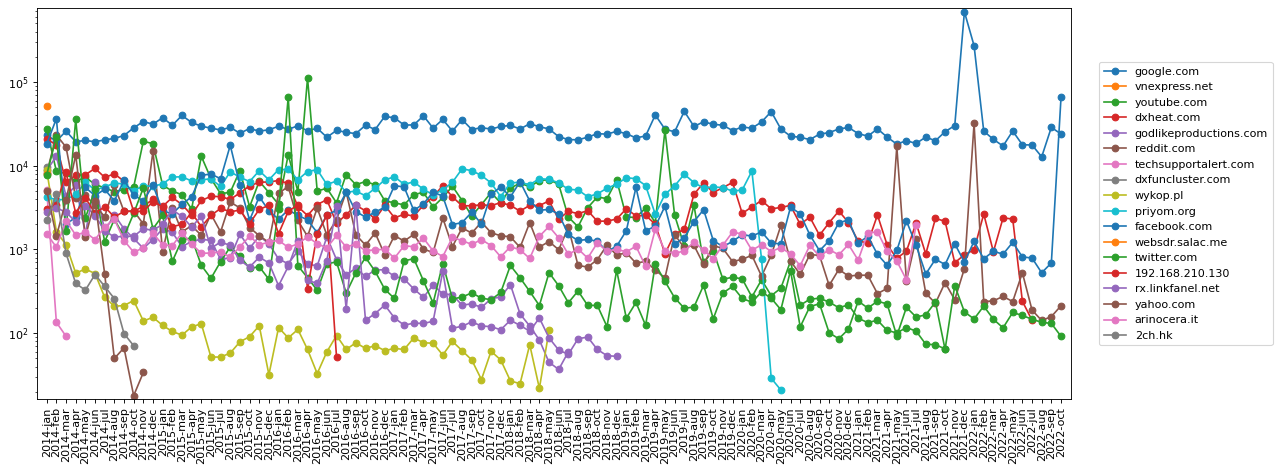

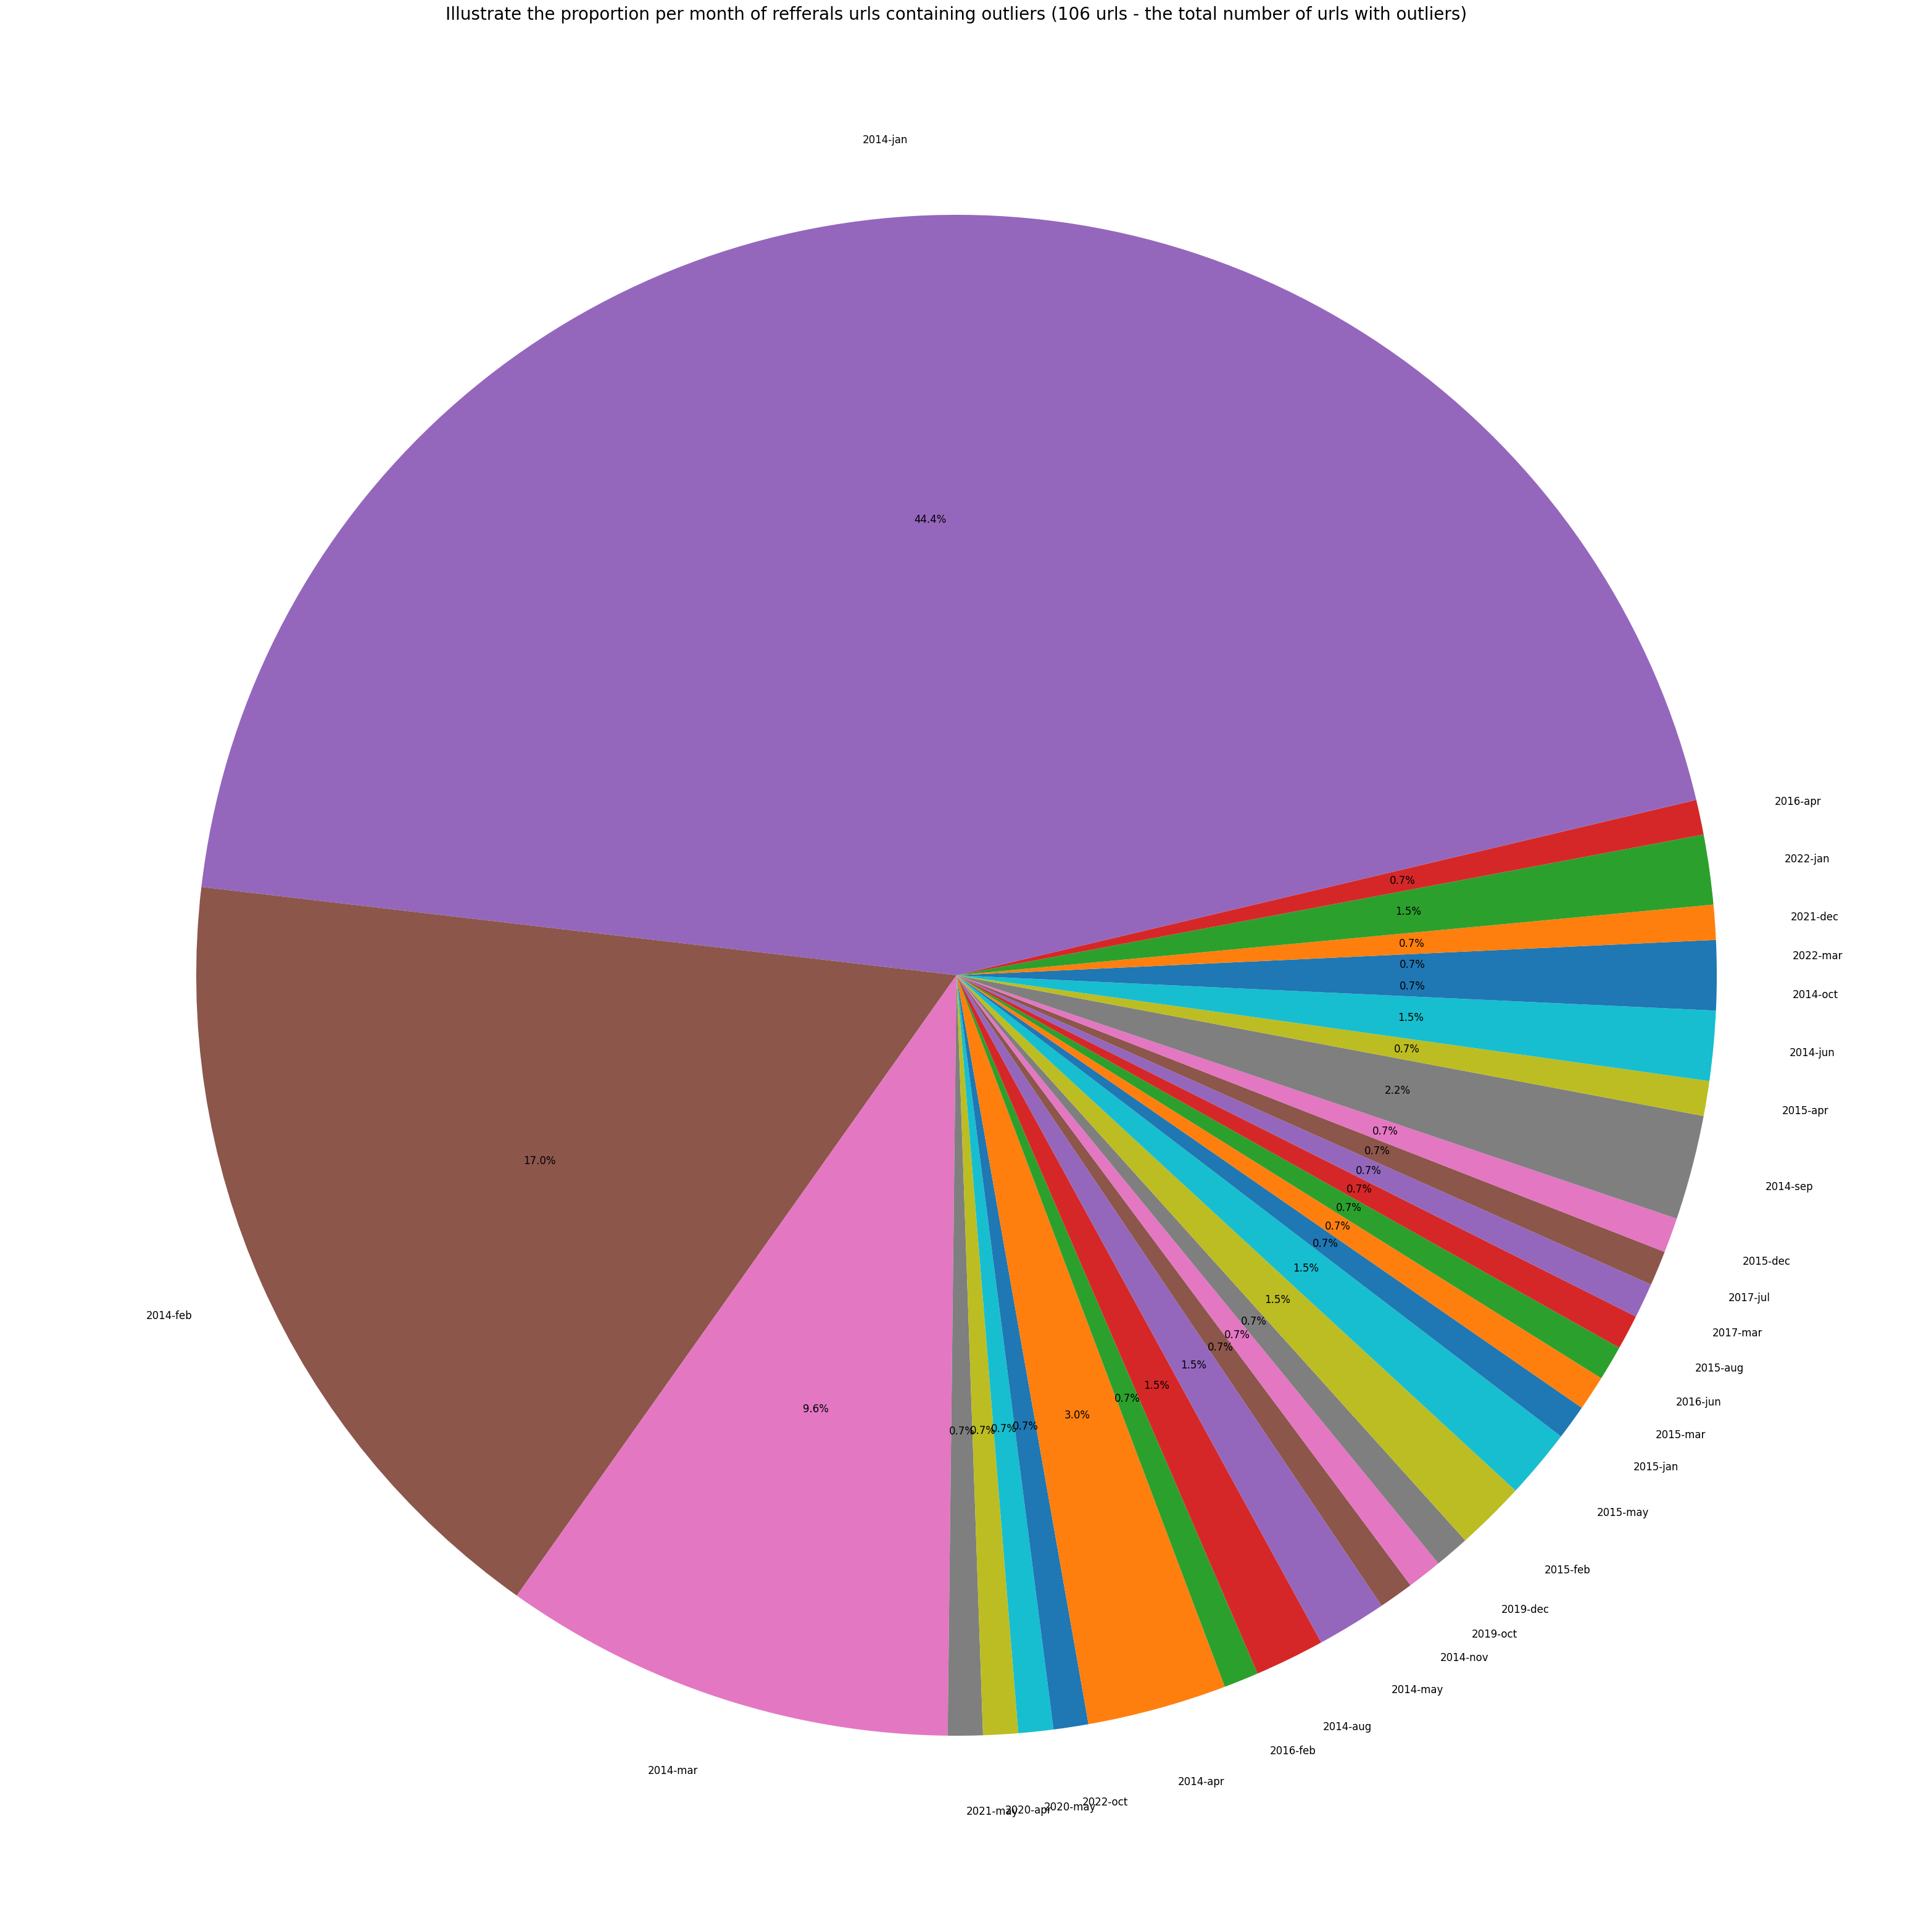

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import defaultdict
from collections import Counter
from scipy import signal
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Processing the dataframe from the csv file


data_file_name = "referrer-monthly-top100.csv"

df = pd.read_csv(data_file_name,index_col=False)

df = df.iloc[: , 1:]

df = df.iloc[2:]

df = df.reset_index(drop=True)

for i in range(0,106):
    df[str(i)] = list(zip(df.iloc[:,i], df.iloc[:,i+106]))


df = df.iloc[: , 212:]
urls = [] 

urls = df.stack().tolist()
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di


dictionary = {}
dictionary = Convert(urls, dictionary)

df2 = pd.DataFrame.from_dict(dictionary, orient='index').T
dates = ['-jan',
    '-feb',
    '-mar',
    '-apr',
    '-may',
    '-jun',
    '-jul',
    '-aug',
    '-sep',
    '-oct',
    '-nov',
    '-dec']
fullListDates = []
for i in range(2014,2023):
    as_string = str(i)
    
    for j in range(len(dates)):

        fullListDates.append(as_string + dates[j])
        if as_string == "2022" and j == 9:
            break


df2["Dates"] = pd.Series(fullListDates)
first_column = df2.pop('Dates')
  

df2.insert(0, 'Dates', first_column)

figure(figsize=(16, 6), dpi=80, layout='tight')
plt.margins(0.01)

dates_x = df2["Dates"]
plt.xticks(ticks=[j for j in range(0,106)], labels=df2["Dates"], rotation=90)
colnames = []
for i in range(2,20):
    colname = df2.columns[i]
    colnames.append(colname)
    plt.plot(df2[colname], linestyle='-', marker='o')

plt.yscale('log')
plt.legend(colnames,bbox_to_anchor = (1.2, 0.5), loc='center right')
plt.show()



df2.loc['mean'] = df2.mean()
df2.loc['std'] = df2.std()



df3 = df2.iloc[106]

df4 = df2.loc['std']
df2 = df2.iloc[:-1 , :]
df3 = df3.iloc[1: ]
df4 = df4.iloc[1: ]

d = defaultdict(list)
dates = []
c = 0
sites_dates = {} 

#Comparing the mean +/- three time the standard deviation of each url with his number of counts each month to
# check if there exists any outliers

for (colname,colval) in df2.iteritems():
    columnValues = []
    columnValues = colval.values
    if colname !="Dates":
        for i in range(len(columnValues)):
            
            if columnValues[i] > 3*df4[colname] + df3[colname] or columnValues[i] < df3[colname] - (3*df4[colname]):
                sites_dates.setdefault(colname, [])
                sites_dates[colname].append([df2.loc[i, 'Dates'],columnValues[i]])
                c+=1
                d[colname].append(df2.loc[i, 'Dates'])
                dates.append(df2.loc[i, 'Dates'])
        
count = Counter(dates)    
#Creating a pie chart to show the percentage of urls for each month that had ouliers. Only 106 urls had outliers from the total
# number of unique urls, most of them at the beggining of 2014.

plt.pie(x = [v for v in count.values()], labels=[k for k in count],autopct='%1.1f%%', textprops={'fontsize': 12})
fig = plt.gcf()
fig.set_size_inches(40,40)
plt.title("Illustrate the proportion per month of refferals urls containing outliers (106 urls - the total number of urls with outliers)",fontsize =  20)
plt.show()

df5 = pd.DataFrame.from_dict(sites_dates,orient='index').transpose()
#Saving the outliers counts and the dates in a csv file

df5.to_csv('data.csv')